<a href="https://colab.research.google.com/github/Saumi18/Credit-Risk-Modeling/blob/main/Credit_Score_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Set Style & Context.
sns.set(style="dark")
sns.set(context = "notebook")

In [7]:
data = pd.DataFrame(pd.read_csv('TrainingData.csv'))

In [8]:
data.head() #Display of the first five rows of the training dataset.

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print("No of rows & columns respectively:", data.shape)
print("Info:")
print(data.info())
data.isna().sum()

No of rows & columns respectively: (96806, 1216)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96806 entries, 0 to 96805
Columns: 1216 entries, account_number to onus_attribute_48
dtypes: float64(1189), int64(27)
memory usage: 898.1 MB
None


,0
account_number,0
bad_flag,0
onus_attribute_1,25231
transaction_attribute_1,25231
transaction_attribute_2,25231
...,...
onus_attribute_44,85196
onus_attribute_45,85196
onus_attribute_46,85196
onus_attribute_47,85196


# **Performing EDA**



<ipython-input-10-af282dbb1c3c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['bad_flag'], palette='coolwarm')


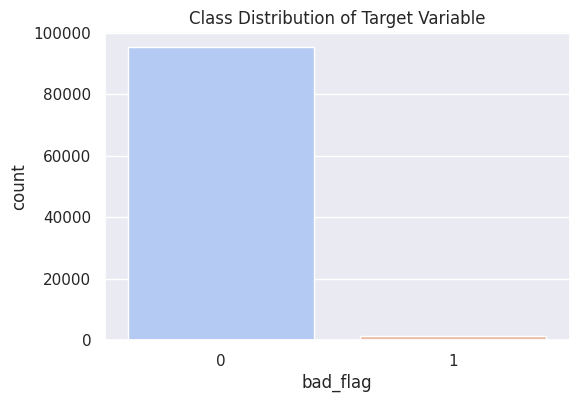

In [10]:
# Distribution of Target Variable
if 'bad_flag' in data.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data['bad_flag'], palette='coolwarm')
    plt.title("Class Distribution of Target Variable")
    plt.show()

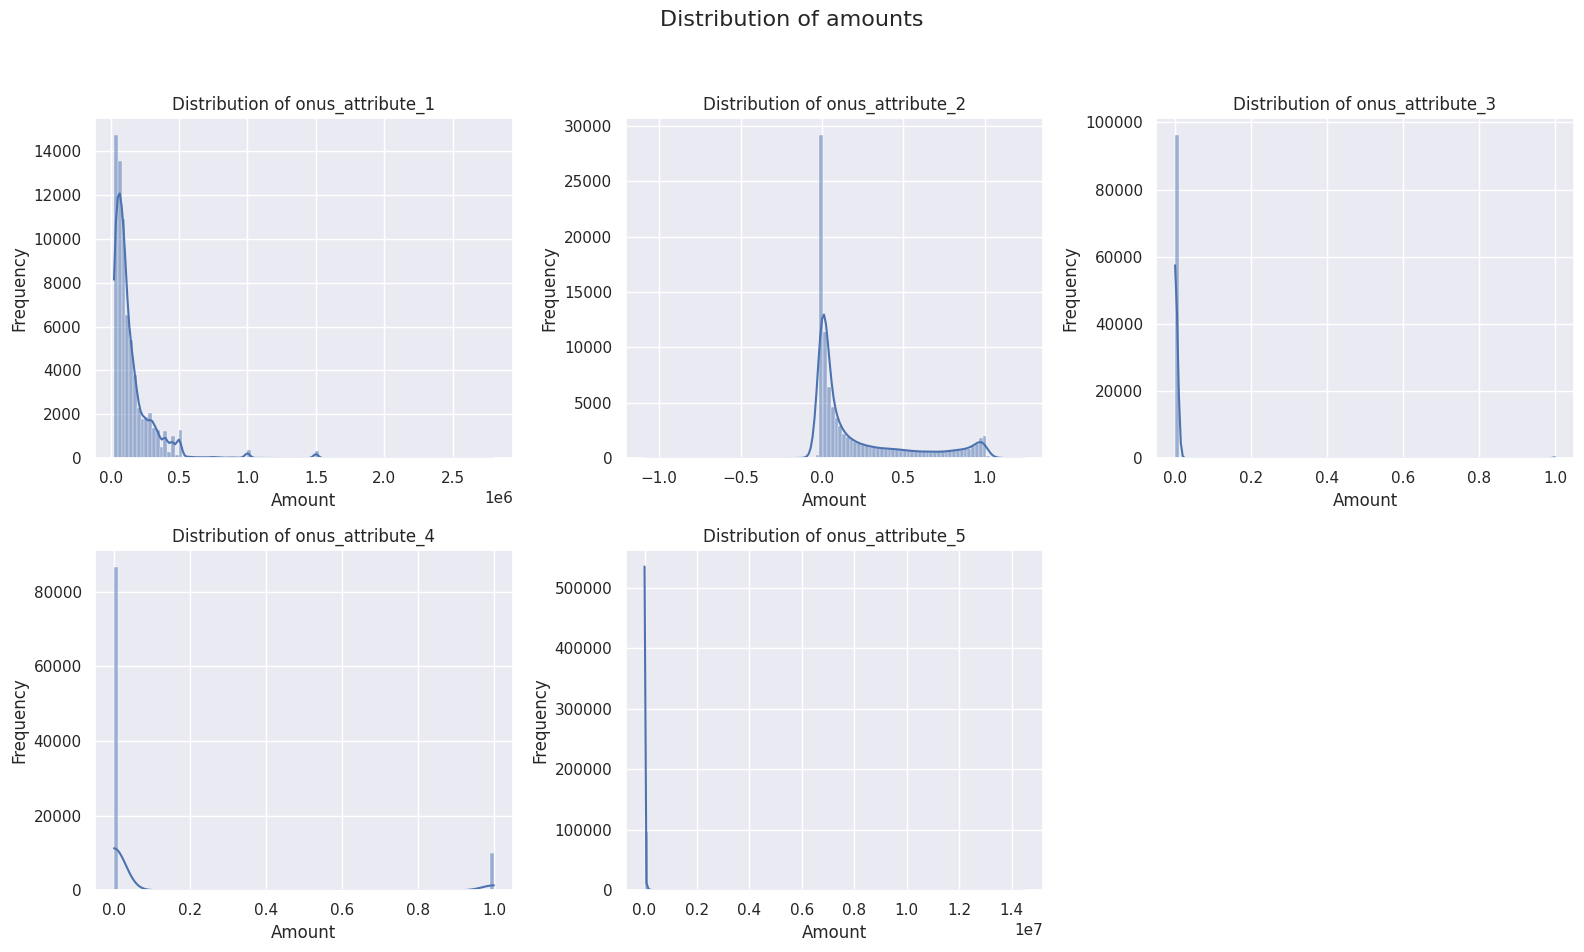

In [11]:
#Distribution of amounts
plt.figure(figsize=(16, 10))

#Amount-related columns in the dataset
amt_cols = [col for col in data.columns if 'attribute' in col and 'amount' in col or 'onus' in col]

#Histograms of the selected columns
for i, col in enumerate(amt_cols[:5], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], bins=100, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')

plt.suptitle('Distribution of amounts', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

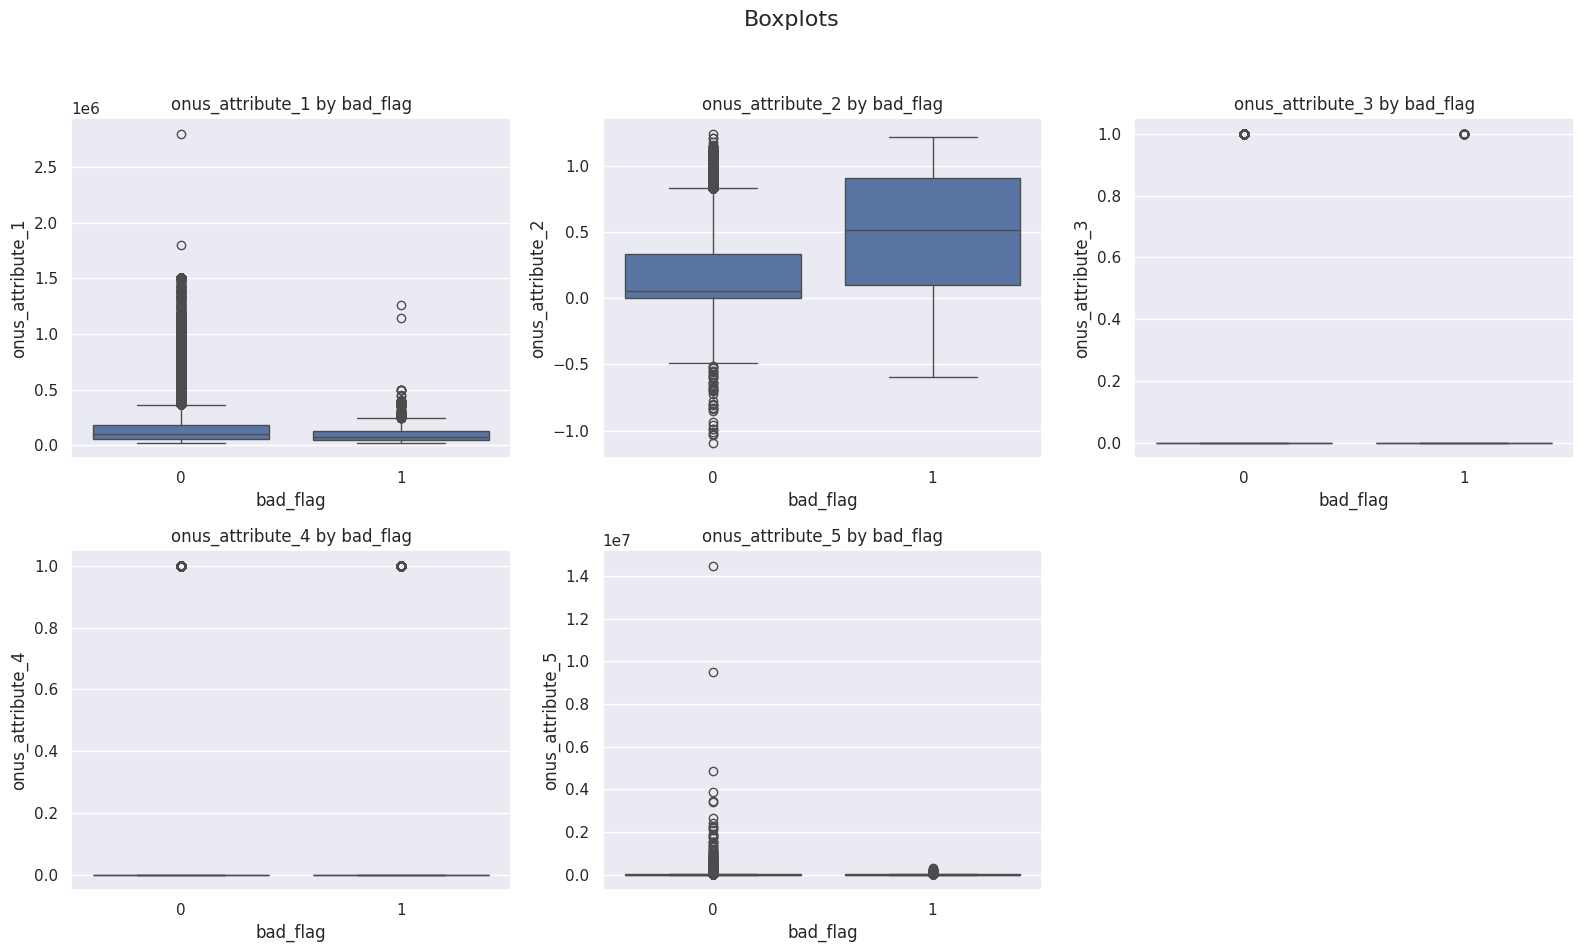

In [12]:
#Boxplots to detect outliers by target variable
plt.figure(figsize=(16, 10))

#Boxplots are generated for amount columns based on target
for i, col in enumerate(amt_cols[:5], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, x='bad_flag', y=col)
    plt.title(f'{col} by bad_flag')

plt.suptitle('Boxplots', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

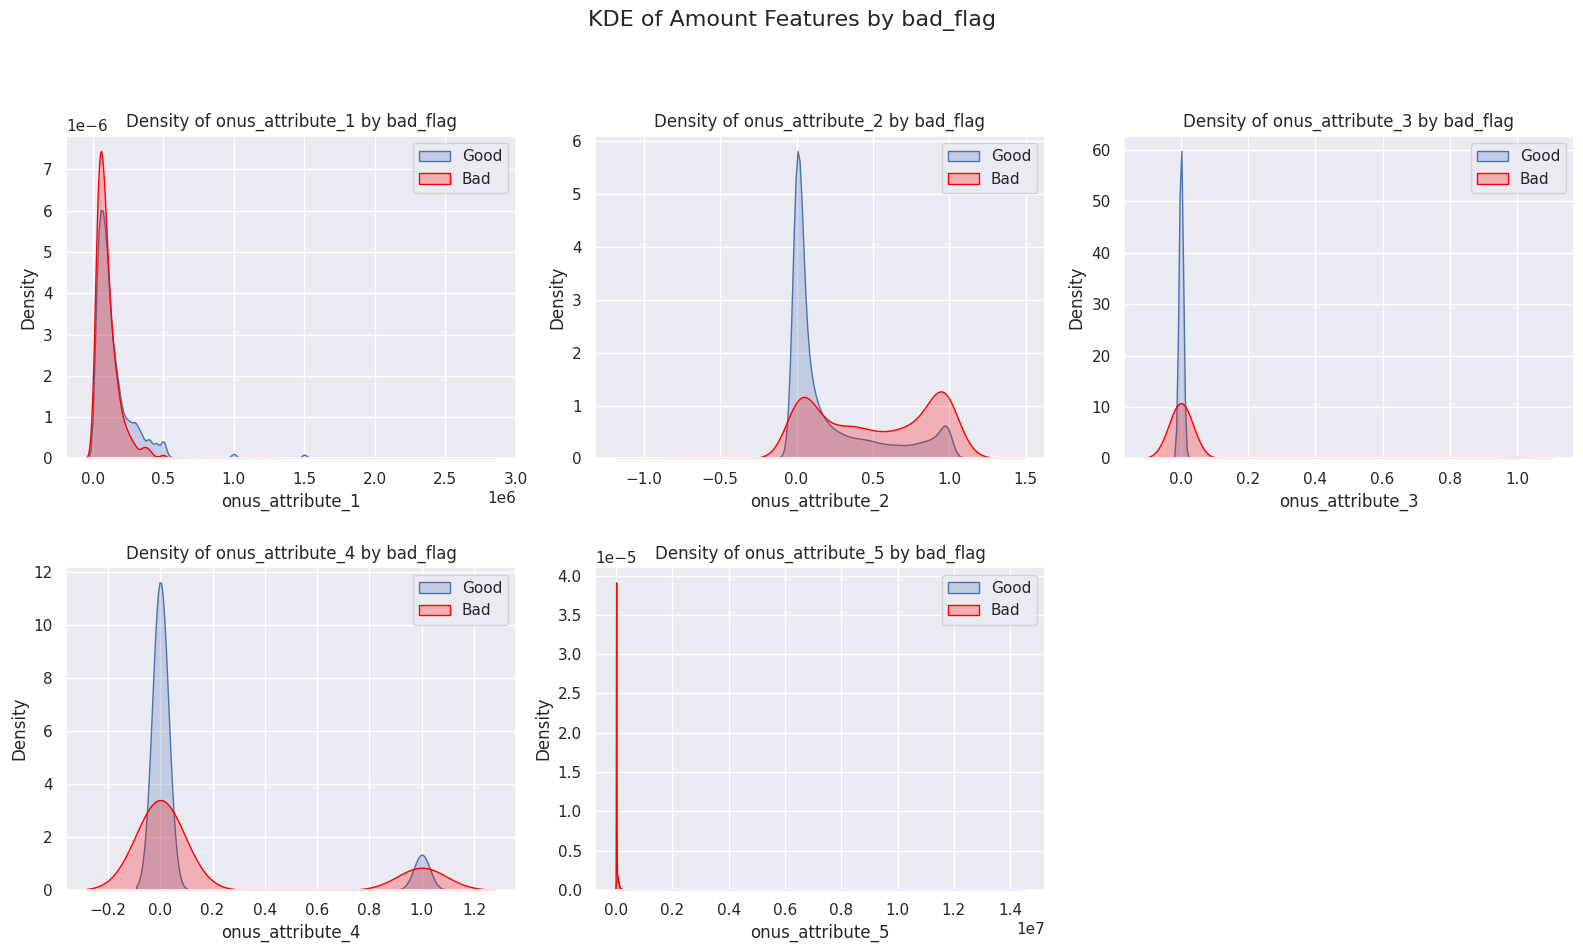

In [13]:
#Distribution shift for bad/good accounts
plt.figure(figsize=(16, 10))

#Kernel Density Estimation (KDE) plots to observe distribution differences
for i, col in enumerate(amt_cols[:5], 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data[data['bad_flag']==0][col], label='Good', fill=True)
    sns.kdeplot(data[data['bad_flag']==1][col], label='Bad', fill=True, color='red')
    plt.title(f'Density of {col} by bad_flag')
    plt.legend()

plt.suptitle('KDE of Amount Features by bad_flag', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

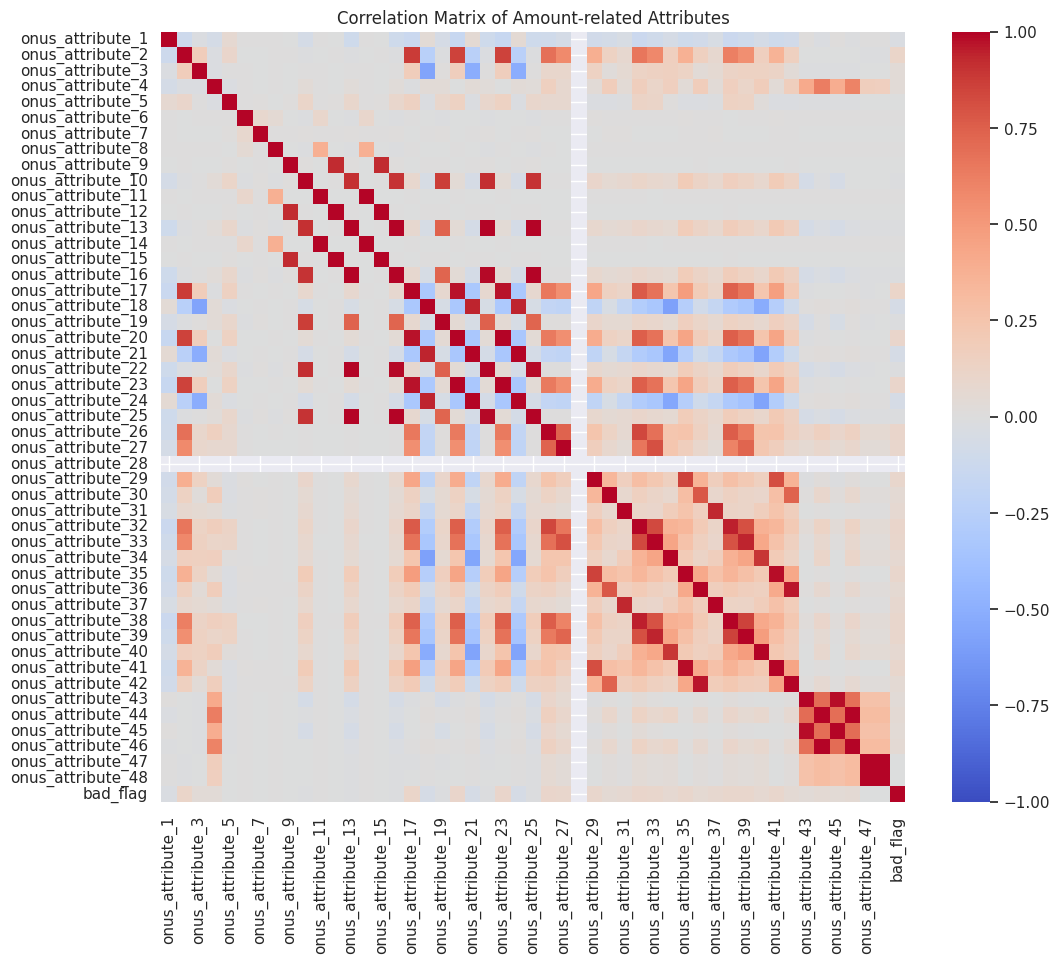

In [14]:
#Correlation Heatmap (Top Amount Features)
subset = data[amt_cols + ['bad_flag']].fillna(0)
corr = subset.corr()

#Correlation matrix of the selected features
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, vmax=1.0, vmin=-1.0)
plt.title("Correlation Matrix of Amount-related Attributes")
plt.show()

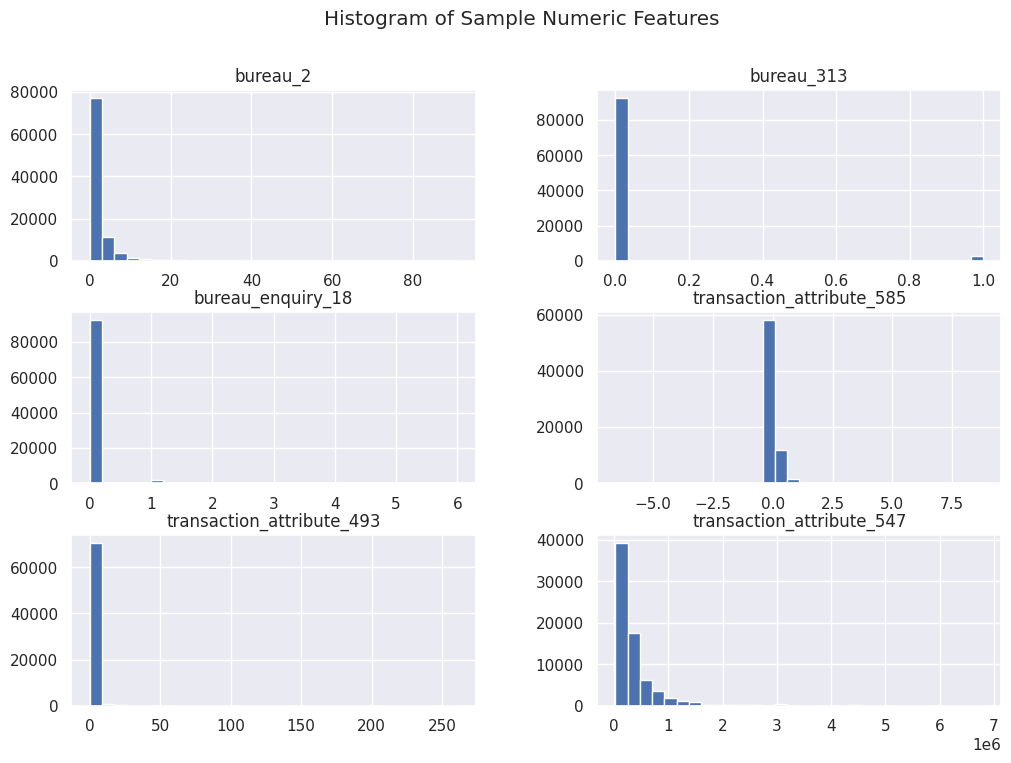

In [15]:
#Histogram of Selected Features
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

#Choosing 6 numeric-columns randomly to visualize the distribution of their values
#Running it multiple times allows exploration of different aspects of the data each time
sample_features = np.random.choice(numeric_cols, size=6, replace=False)

data[sample_features].hist(figsize=(12, 8), bins=30)
plt.suptitle("Histogram of Sample Numeric Features")
plt.show()

# **Data Preprocessing**

In [16]:
data = data.drop(columns = ['account_number']) #No use of this column in training

In [17]:
#Handling missing values > 70% in a column.
missing_percent = data.isna().mean()
data = data.loc[:, missing_percent < 0.7] #Columns with missing values > 70% will be removed.
print("Shape after dropping columns that have higher no of missing values:", data.shape)

Shape after dropping columns that have higher no of missing values: (96806, 1199)


In [18]:
#Handling outliers using log transform for skewed numerical columns (only the features)
#Log transformation is applied to skewed columns to reduce the impact of outliers & normalize the distribution
for col in data.select_dtypes(include=[np.number]).columns:
    if col != 'bad_flag' and (data[col] > 0).all(): #Only features & positive values
        data[col] = np.log1p(data[col]) #Applying log1p (preferred for numerical stability & precision) function which computes the natural logarithm of (data[col]+1)

In [19]:
#Removing near-zero variance features
#Features with very low variance contribute little to the model's ability to make predictions, so they are removed
from sklearn.feature_selection import VarianceThreshold

X = data.drop(columns=['bad_flag'])
selector = VarianceThreshold(threshold=0.01)
X = pd.DataFrame(selector.fit_transform(data))

#Combine reduced features with target again
data = pd.concat([X, data['bad_flag']], axis=1)

In [20]:
#Dropping highly correlated features
corr_matrix = data.drop(columns=['bad_flag']).corr().abs()  # Exclude target
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) #Upper-triangle of the matrix
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)] #Columns with correlation above .95
data.drop(columns=to_drop, inplace=True)

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

X = data.drop(columns='bad_flag')
y = data['bad_flag']

#Handle missing values (mean imputation)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  #Fill missing values

#Standardizing the features
scaler = StandardScaler() #Mean = 0 & Variance = 1
X_scaled = scaler.fit_transform(X_imputed) #Fits the data into a model & transforms it such that it's more suitable for the model in a single step.

#Apply SMOTE to balance the classes (as there is a class imbalance - biased towards 0)
X_scaled_df = pd.DataFrame(X_scaled, columns=[str(i) for i in range(X_scaled.shape[1])])  #Features (after scaling)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled_df, y)

print(f"Resampled data shape: {X_resampled.shape}, {y_resampled.shape}")

Resampled data shape: (190868, 724), (190868,)


**Applying PCA**

In [22]:
from sklearn.decomposition import PCA

#Apply PCA
pca = PCA(n_components = 0.95)  #Keeps 95% variance
principal_components = pca.fit_transform(X_resampled)

# Convert PCA results to DataFrame
pca_df = pd.DataFrame(principal_components)

print(f"Reduced shape after PCA: {pca_df.shape}")
print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.2f}")

Reduced shape after PCA: (190868, 304)
Explained variance ratio: 0.95


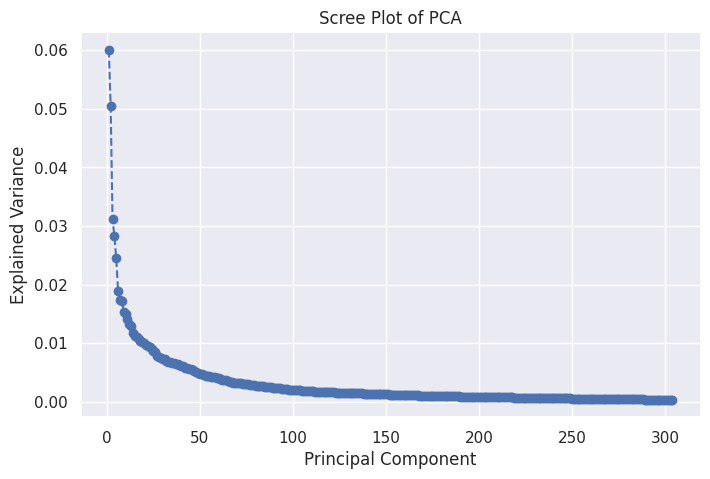

<ipython-input-23-f59685c7c5b0>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=pca_df[0], y=pca_df[1], alpha=0.6, palette="coolwarm")


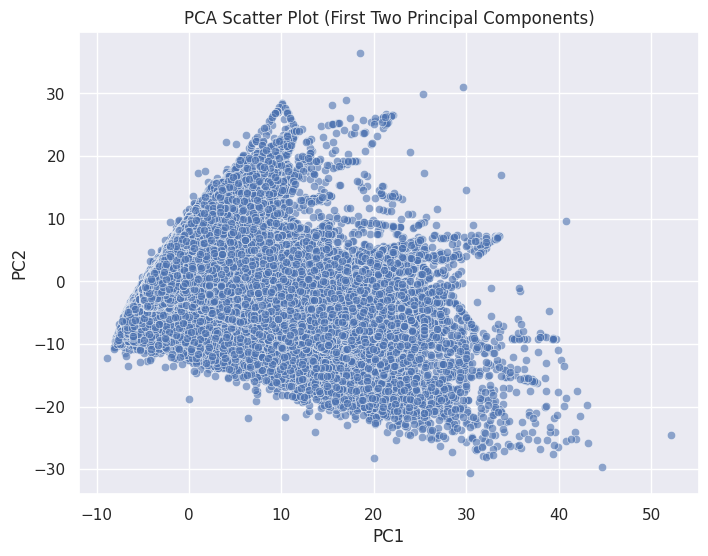

In [23]:
#Scree Plot: Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.title("Scree Plot of PCA")
plt.grid(True)
plt.show()

#PCA Scatter Plot (First Two Principal Components)
if pca_df.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_df[0], y=pca_df[1], alpha=0.6, palette="coolwarm")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Scatter Plot (First Two Principal Components)")
    plt.grid(True)
    plt.show()

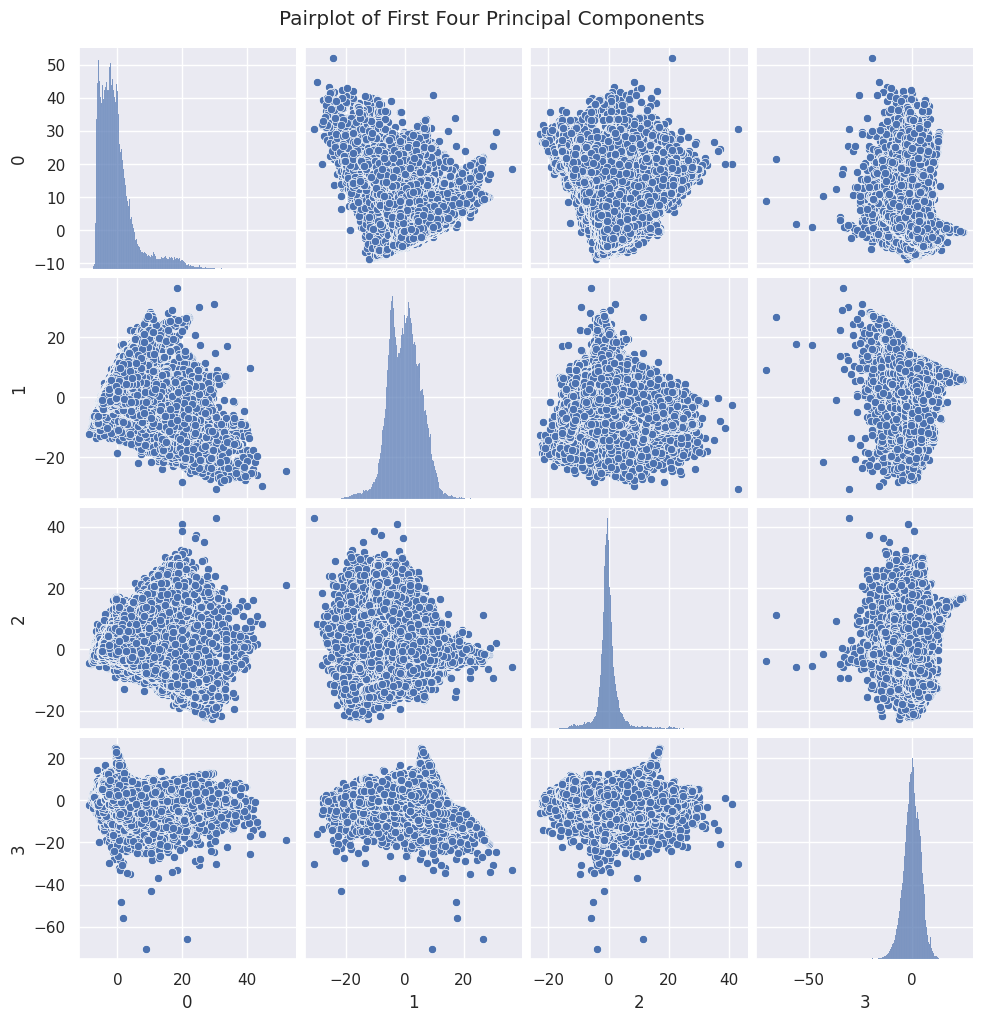

In [24]:
# Pairplot of First Four Principal Components
if pca_df.shape[1] >= 4:
    sns.pairplot(pca_df.iloc[:, :4])
    plt.suptitle("Pairplot of First Four Principal Components", y=1.02)
    plt.show()

#**Multi-Layer Perceptron Model**
